In [ ]:
# General imports
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn



# Import AzureML-Core
#from azureml.core import Workspace, Dataset, Datastore

# Register workspace
#ws = Workspace.from_config()

# Import dataset from Azure ML
#dataset = Dataset.get_by_name(ws, name='water_potability_cleaned')

# Convert to pandas.DataFrame
#dfo = dataset.to_pandas_dataframe() # dfo = DataFrame Original

## Import data

In [1]:
df_raw = pd.read_csv('Data/water_potability.csv')
df_cleaned = pd.read_csv('Data/water_potability_cleaned.csv')
df_logical = pd.read_csv('Data/water_potability_engineered_logical.csv')
df_brute = pd.read_csv('Data/water_potability_engineered_brute.csv')

df_list = [df_raw, df_cleaned, df_logical, df_brute]

<AxesSubplot:ylabel='Frequency'>

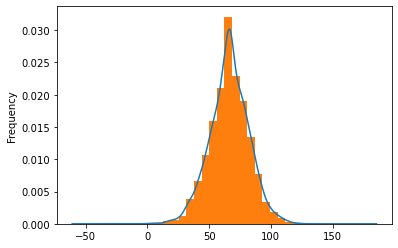

In [14]:
var = df_cleaned.Trihalomethanes
var.plot.density()
var.plot.hist(density=True, bins=20)

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from flaml import AutoML
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [47]:
def train_custom(dataset):
    X = dataset.drop(['Potability'], axis=1)
    y = dataset['Potability']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    automl = AutoML()
    automl_settings = {
        "time_budget": 180,
        "metric": 'accuracy',
        "task": 'classification',
        "verbose": 1,
    }
    automl.fit(X_train = X_train, y_train = y_train,
        **automl_settings)


    y_pred = automl.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [48]:
accuracy_list = [] 

for ds in df_list:
    accuracy_list.append(train_custom(ds))


/home/ebbe/miniconda3/envs/azure/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ebbe/miniconda3/envs/azure/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ebbe/miniconda3/envs/azure/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ebbe/miniconda3/envs/azure/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ebbe/miniconda3/envs/azure/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ebbe/miniconda

In [49]:
accuracy_list

[0.6776556776556777, 0.7887667887667887, 0.78998778998779, 0.7032967032967034]

In [ ]:
from imblearn.over_sampling import SMOTE
samp = SMOTE()
X = df.drop(['Potability'], axis=1)
y = df['Potability']

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#X_train, y_train = samp.fit_resample(X_train, y_train)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import xgboost as xgb
import seaborn as sns

In [ ]:
#model_tree = DecisionTreeClassifier()
model_GBC = GradientBoostingClassifier()

# Parameters for GBC

learning_rate = [0.09, 0.1, 0.11, 0.12, 0.13]
max_depth = [4,5,6]
n_estimators = [60,70,80,100,200,300,400,500,600,700]

param_grid = {'learning_rate': learning_rate, 
              'max_depth': max_depth,
              'n_estimators': n_estimators}
gs_GBC = GridSearchCV(estimator=model_GBC,
                      param_grid = param_grid,
                      scoring = 'accuracy',
                      n_jobs = 4,
                      cv=3,
                      verbose=3,
                      return_train_score = False)
gs_GBC.fit(X_train, y_train)              
gs_GBC        
#cv_score_tree = cross_val_score(model_tree, X_train, y_train, scoring = 'accuracy', cv=5).mean()
#cv_score_GBC = cross_val_score(model_GBC, X_train, y_train, scoring = 'accuracy', cv=5).mean()

#print(f'Tree: {cv_score_tree}', f'GBC: {cv_score_GBC}', sep='\n')

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV 3/3] END learning_rate=0.09, max_depth=4, n_estimators=60;, score=0.791 total time=   0.4s
[CV 1/3] END learning_rate=0.09, max_depth=4, n_estimators=60;, score=0.792 total time=   0.4s
[CV 2/3] END learning_rate=0.09, max_depth=4, n_estimators=60;, score=0.768 total time=   0.4s
[CV 1/3] END learning_rate=0.09, max_depth=4, n_estimators=70;, score=0.794 total time=   0.5s
[CV 2/3] END learning_rate=0.09, max_depth=4, n_estimators=70;, score=0.766 total time=   0.5s
[CV 3/3] END learning_rate=0.09, max_depth=4, n_estimators=70;, score=0.790 total time=   0.5s
[CV 1/3] END learning_rate=0.09, max_depth=4, n_estimators=80;, score=0.802 total time=   0.5s
[CV 2/3] END learning_rate=0.09, max_depth=4, n_estimators=80;, score=0.766 total time=   0.5s
[CV 3/3] END learning_rate=0.09, max_depth=4, n_estimators=80;, score=0.792 total time=   0.5s
[CV 1/3] END learning_rate=0.09, max_depth=4, n_estimators=100;, score=0.789 total

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'learning_rate': [0.09, 0.1, 0.11, 0.12, 0.13],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [60, 70, 80, 100, 200, 300, 400, 500,
                                          600, 700]},
             scoring='accuracy', verbose=3)

In [ ]:
gs_GBC.best_score_

0.7944647944647946

In [ ]:
y_pred = gs_GBC.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='RdYlGn')
print(accuracy_score(y_test, y_pred))


NameError: name 'gs_GBC' is not defined

In [ ]:
model_xgb = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric = 'logloss')
model_xgb.fit(X_train, y_train);

<class 'numpy.ndarray'>
0.7973137973137974


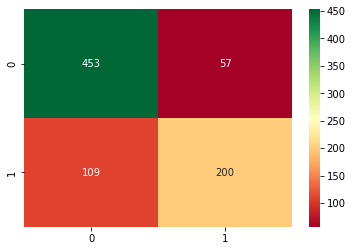

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
print(type(cf_matrix))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='RdYlGn')
print(accuracy_score(y_test, y_pred_xgb))
#cv_score_xgb = cross_val_score(model_xgb, X_train, y_train, scoring = 'accuracy', cv=5).mean()
#model_xgb.fit(X_train, y_train, verbose=False, early_stopping_rounds=10, eval_metric='error', eval_set=[(X_test, y_test)])

In [ ]:
model_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [ ]:
X_o = df.drop(['Potability'], axis=1)
y_o = df['Potability']
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, random_state=42)

<class 'numpy.ndarray'>
0.7777777777777778


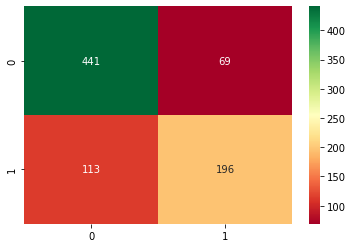

In [ ]:
# Create and train model
model_xgb_o = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric = 'logloss')
model_xgb_o.fit(X_train_o, y_train_o)

# Predict
y_pred_xgb_o = model_xgb_o.predict(X_test_o)
cf_matrix = confusion_matrix(y_test, y_pred_xgb_o)
print(type(cf_matrix))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='RdYlGn')
print(accuracy_score(y_test, y_pred_xgb_o))